1. Загрузить выборку с сайта Kaggle.com.
2. Внимательно изучите документацию на matplotlib (https://matplotlib.org/3.1.1/index.html), узнайте про другие типы графиков, постройте некоторые из них, какие понравятся.
3. Построить гистограмму распределения по каждому показателю.
4. Построить Ящик с усами для выявления выбросов по показателю.
5. Построить Тепловую карту и сделать вывод о том какая зависимость между показателями

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


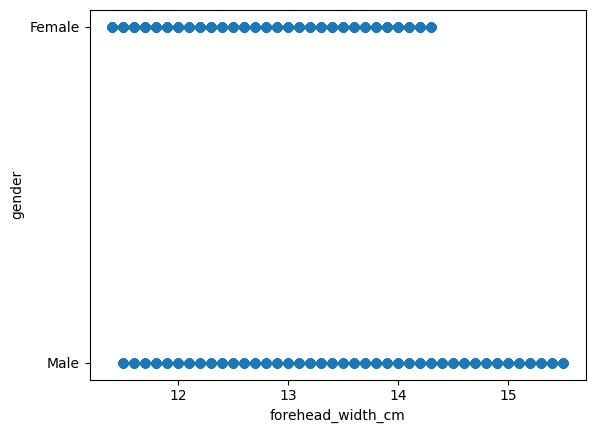

In [4]:
# Диаграмма рассеяния

plt.xlabel('forehead_width_cm')
plt.ylabel('gender')
plt.scatter(x=df['forehead_width_cm'], y=df['gender'])

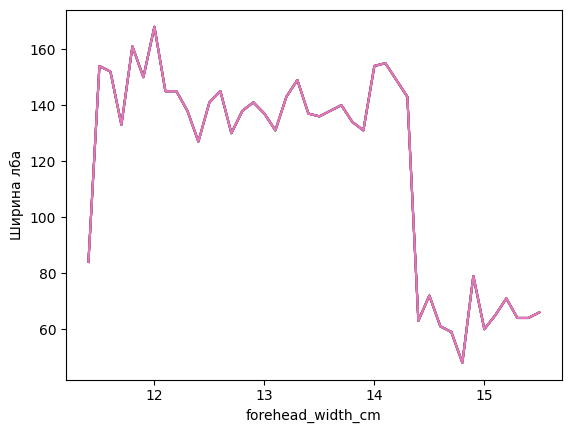

In [8]:
# Линейный гарфик

d = df.groupby(['forehead_width_cm']).count()
plt.xlabel('forehead_width_cm')
plt.ylabel('Ширина лба')
plt.plot(d.index, d.values)

(array([0.33359182, 0.29652606, 0.26872674, 0.26628821, 0.27311611,
        0.26726362, 0.28725962, 0.16533279, 0.119976  , 0.16094342]),
 array([11.4 , 11.81, 12.22, 12.63, 13.04, 13.45, 13.86, 14.27, 14.68,
        15.09, 15.5 ]),
 <BarContainer object of 10 artists>)

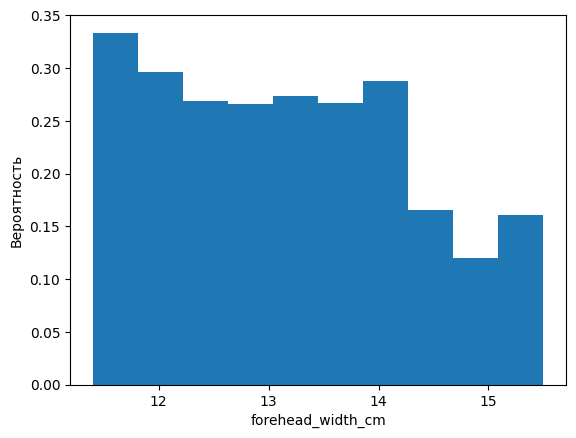

In [9]:
# гистограмма
plt.xlabel('forehead_width_cm')
plt.ylabel('Вероятность')
plt.hist(x=df['forehead_width_cm'], bins=10, density=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7da9cfa18b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7da9cfa19060>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7da9cfa18790>],
 'medians': [<matplotlib.lines.Line2D at 0x7da9cfa195a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7da9cfa19ae0>],
 'means': [<matplotlib.lines.Line2D at 0x7da9cfa19840>]}

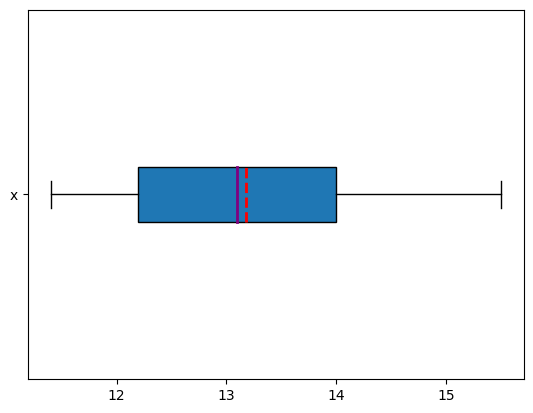

In [10]:
plt.boxplot(x=df['forehead_width_cm'], vert=False, showmeans=True, meanline=True, labels=('x'), patch_artist=True, medianprops={'linewidth': 2, 'color': 'purple'}, meanprops={'linewidth': 2, 'color': 'red'})

• Среднее значение — это красная пунктирная линия.

• Медиана — это фиолетовая линия.

• Первый квартиль — левый край синего прямоугольника.

• Третий квартиль — это правый край синего прямоугольника.

• Межквартильный диапазон — это длина синего прямоугольника.

• Диапазон — всё слева направо.

• Выбросы — точки слева и справа.

<ipython-input-11-197b3858ac32>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->создает матрицу корреляции


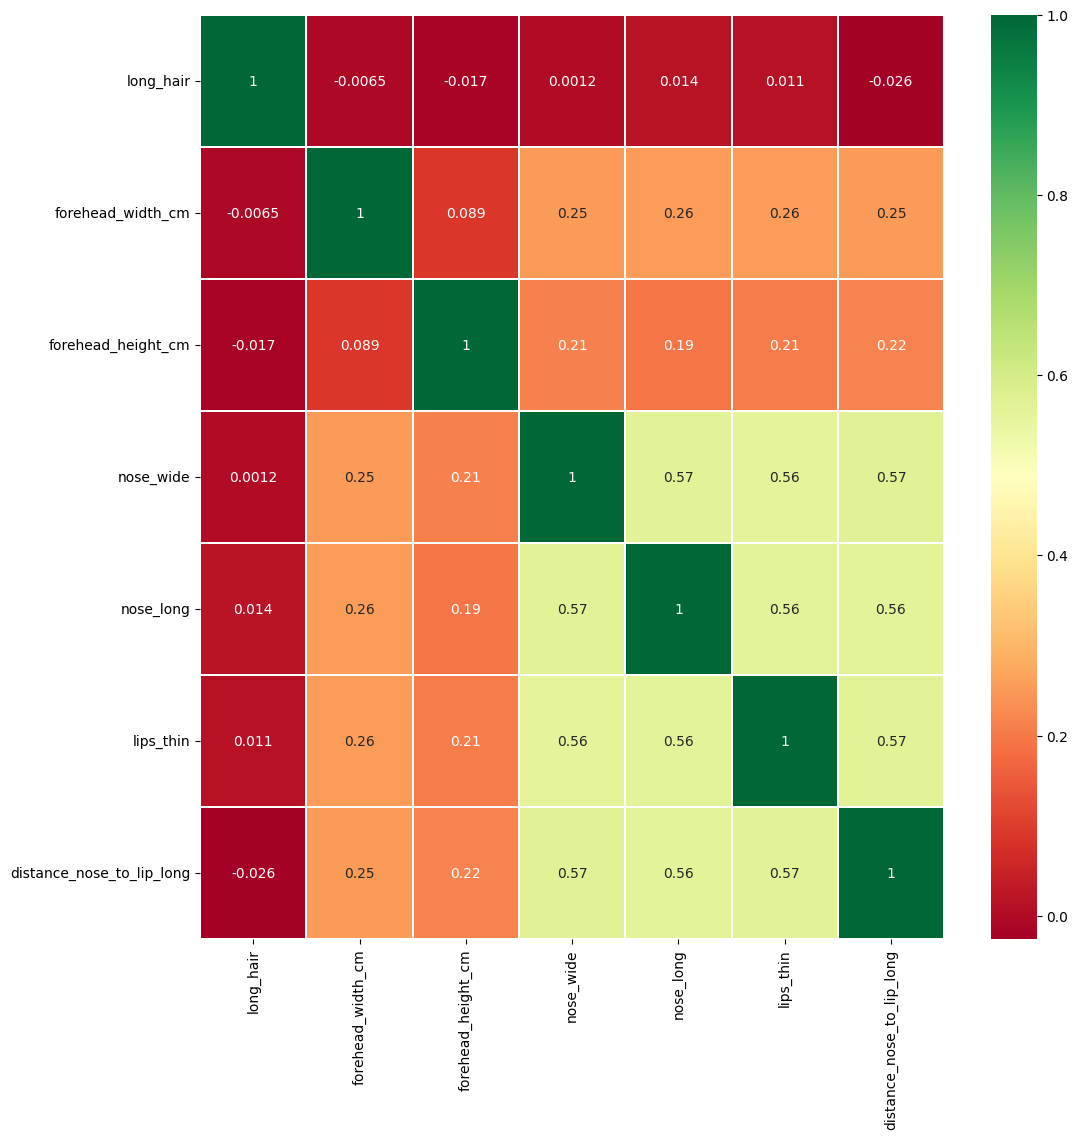

In [11]:
# тепловая карта
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->создает матрицу корреляции
# используется для получения текущего значения
fig=plt.gcf()
# Увстанавливаем размер диаграммы
fig.set_size_inches(12,12)
plt.show()

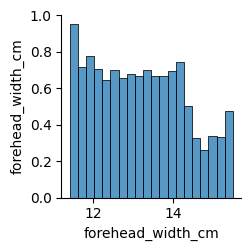

In [13]:
# Парный график

sns_plot = sns.pairplot(df[['forehead_width_cm','gender']])

array([<Axes: >], dtype=object)

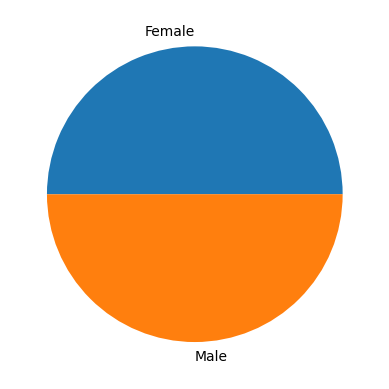

In [15]:
# Круговые диаграммы

d = df.groupby('gender', sort=True).size().sort_values(ascending = False)
#строим график
d.plot(kind='pie', subplots=True)